In [254]:
# Chaitnaya Mangla AI - DS B1
# Credit Risk Assesssment ML Project 
# Use Classification to predict if a loan applicant is at low Risk or high Risk for defaulting 

In [255]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [256]:
# Creating a synthetic dataset 
np.random.seed(42)
n_samples = 1000

data = pd.DataFrame({'Income' : np.random.normal(50000, 15000, n_samples).astype(int),
                     'Credit_Score' : np.random.randint(300,850,n_samples),
                      'Loan_Amount' : np.random.normal(20000, 5000, n_samples).astype(int),
                       'Employment_Status' : np.random.choice(['Employed','Unemployed','Self-Employed'], n_samples),
                        'Existing_Debts': np.random.normal(5000, 2000, n_samples).astype(int)
                         }) 
                     

In [257]:
# Here we are loading this dataset in the tabular form 
data 

,Income,Credit_Score,Loan_Amount,Employment_Status,Existing_Debts
0,57450,727,26109,Unemployed,3601
1,47926,604,28747,Unemployed,7324
2,59715,616,14927,Employed,5093
3,72845,308,23914,Unemployed,6393
4,46487,372,15172,Unemployed,5640
...,...,...,...,...,...
995,45783,826,21660,Self-Employed,1126
996,76965,325,24405,Self-Employed,4184
997,59612,705,18098,Employed,1332
998,41432,531,10409,Employed,3993


In [258]:
# Generate target variable: 0 = Low Risk, 1 = High Risk
# Simplified rule: high debt-to-income ratio and low credit score -> high risk
data['Debt_to_Income'] = data['Existing_Debts'] / data['Income']
data['Risk'] = ((data['Debt_to_Income'] > 0.2) & (data['Credit_Score'] < 600)).astype(int)


In [259]:
data=pd.get_dummies (data,columns=['Employment_Status'], drop_first=True) 

In [260]:
X = data.drop(['Risk'], axis=1)
y = data['Risk']

In [261]:
X # Importing the dataset without the risk column

,Income,Credit_Score,Loan_Amount,Existing_Debts,Debt_to_Income,Employment_Status_Self-Employed,Employment_Status_Unemployed
0,57450,727,26109,3601,0.062681,False,True
1,47926,604,28747,7324,0.152819,False,True
2,59715,616,14927,5093,0.085288,False,False
3,72845,308,23914,6393,0.087762,False,True
4,46487,372,15172,5640,0.121324,False,True
...,...,...,...,...,...,...,...
995,45783,826,21660,1126,0.024594,True,False
996,76965,325,24405,4184,0.054362,True,False
997,59612,705,18098,1332,0.022344,False,False
998,41432,531,10409,3993,0.096375,False,False


In [262]:
y  # The coulmn with risk 0: Low Risk 1: High Risk 

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Risk, Length: 1000, dtype: int64

In [263]:
# Train test and split the model 
from sklearn.model_selection import train_test_split 
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42, stratify = y)

In [264]:
X_train # data on which model is trained 

,Income,Credit_Score,Loan_Amount,Existing_Debts,Debt_to_Income,Employment_Status_Self-Employed,Employment_Status_Unemployed
139,31537,516,15632,4163,0.132004,False,False
921,34602,759,22746,4295,0.124126,False,True
741,30806,707,18560,3023,0.098130,True,False
271,28462,519,25627,3193,0.112185,False,True
524,38551,386,8454,5346,0.138673,False,True
...,...,...,...,...,...,...,...
963,60635,521,23995,1728,0.028498,False,True
302,61209,673,12977,4141,0.067653,False,False
504,40240,724,24317,-160,-0.003976,False,True
569,44727,650,29673,9703,0.216938,False,False


In [265]:
X_test # data on which model is tested 

,Income,Credit_Score,Loan_Amount,Existing_Debts,Debt_to_Income,Employment_Status_Self-Employed,Employment_Status_Unemployed
103,37965,660,19193,6483,0.170763,False,False
284,81995,501,27843,5968,0.072785,False,False
245,44982,405,21675,1719,0.038215,True,False
800,64074,643,20957,6111,0.095374,True,False
532,49008,576,17886,5738,0.117083,True,False
...,...,...,...,...,...,...,...
329,59425,429,14330,1312,0.022078,False,True
587,37252,521,19232,5847,0.156958,False,False
942,59753,382,24762,5788,0.096865,True,False
849,42035,519,19216,3735,0.088855,True,False


In [266]:
y_train # data on which model is trained

139    0
921    0
741    0
271    0
524    0
      ..
963    0
302    0
504    0
569    0
370    0
Name: Risk, Length: 750, dtype: int64

In [267]:
y_test # data on which model is tested 

103    0
284    0
245    0
800    0
532    0
      ..
329    0
587    0
942    0
849    0
411    0
Name: Risk, Length: 250, dtype: int64

In [268]:
# Scaling the numnerical features 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [269]:
X_train_scaled # The model is trained 

array([[-1.26442551, -0.43077518, -0.88052201, ...,  0.30133601,
        -0.72843136, -0.69020139],
       [-1.05705629,  1.12203988,  0.57359094, ...,  0.19850818,
        -0.72843136,  1.4488525 ],
       [-1.3138829 ,  0.78975024, -0.28203414, ..., -0.14080344,
         1.37281295, -0.69020139],
       ...,
       [-0.67560518,  0.89838339,  0.89470585, ..., -1.47356601,
        -0.72843136,  1.4488525 ],
       [-0.37202746,  0.42550967,  1.98948079, ...,  1.40996122,
        -0.72843136, -0.69020139],
       [ 0.00955897,  0.48941152,  0.35856046, ...,  0.50616182,
        -0.72843136, -0.69020139]], shape=(750, 7))

In [270]:
X_test_scaled # The model is tested 

array([[-0.82952523,  0.48941152, -0.15264793, ...,  0.80724335,
        -0.72843136, -0.69020139],
       [ 2.14941988, -0.52662796,  1.61542587, ..., -0.47162782,
        -0.72843136, -0.69020139],
       [-0.35477489, -1.14008576,  0.35467683, ..., -0.9228545 ,
         1.37281295, -0.69020139],
       ...,
       [ 0.64458915, -1.28706003,  0.98566456, ..., -0.15731255,
         1.37281295, -0.69020139],
       [-0.55416056, -0.41160462, -0.14794669, ..., -0.26187636,
         1.37281295, -0.69020139],
       [-1.15664764,  0.32965689,  0.05441089, ..., -0.91657929,
        -0.72843136,  1.4488525 ]], shape=(250, 7))

In [271]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators = 100,random_state = 42) 
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [272]:
# Evaluating the model 
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test) [:,1]

In [273]:
print(y_pred) # Predictions of the whole data 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [274]:
print(y_prob) # Probabilities of the whole dataset 

[0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.   0.84 0.   0.
 0.58 0.   0.   0.   0.6  0.   0.   0.03 0.   0.   0.   0.   0.   0.
 0.   0.01 0.   0.   0.   0.81 0.01 0.7  0.15 0.62 0.   0.   0.   0.
 0.   0.26 0.01 0.   0.02 0.01 0.01 0.54 0.02 0.01 0.14 0.   0.   0.02
 0.01 0.   0.01 0.05 0.   0.01 0.01 0.   0.   0.   0.   0.   0.   0.
 0.   0.01 0.   0.14 0.   0.   0.   0.   0.07 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.05 0.03 0.   0.   0.   0.   0.1  0.29 0.03
 0.   0.05 0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
 0.11 0.   0.01 0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.91 0.   0.   0.   0.   0.
 0.   0.   0.01 0.   0.   0.   0.06 0.   0.   0.01 0.03 0.   0.   0.
 0.02 0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.16
 0.   0.   0.15 0.01 0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.
 0.82 0.02 0.16 0.   0.   0.

In [275]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score 

In [276]:
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))
# Confusion matrix used to visulaize the actual and the predicted values 

Confusion Matrix
 [[239   0]
 [  0  11]]


In [277]:
print("ROC-AUC_Score\n" , roc_auc_score(y_test, y_prob))
# It tells teh ability to differentiate between the positive and negative values 

ROC-AUC_Score
 1.0


In [278]:
print("ClassificationReport\n", classification_report(y_test,y_pred)) 
# It tells the values of the the all the types 

ClassificationReport
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00        11

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



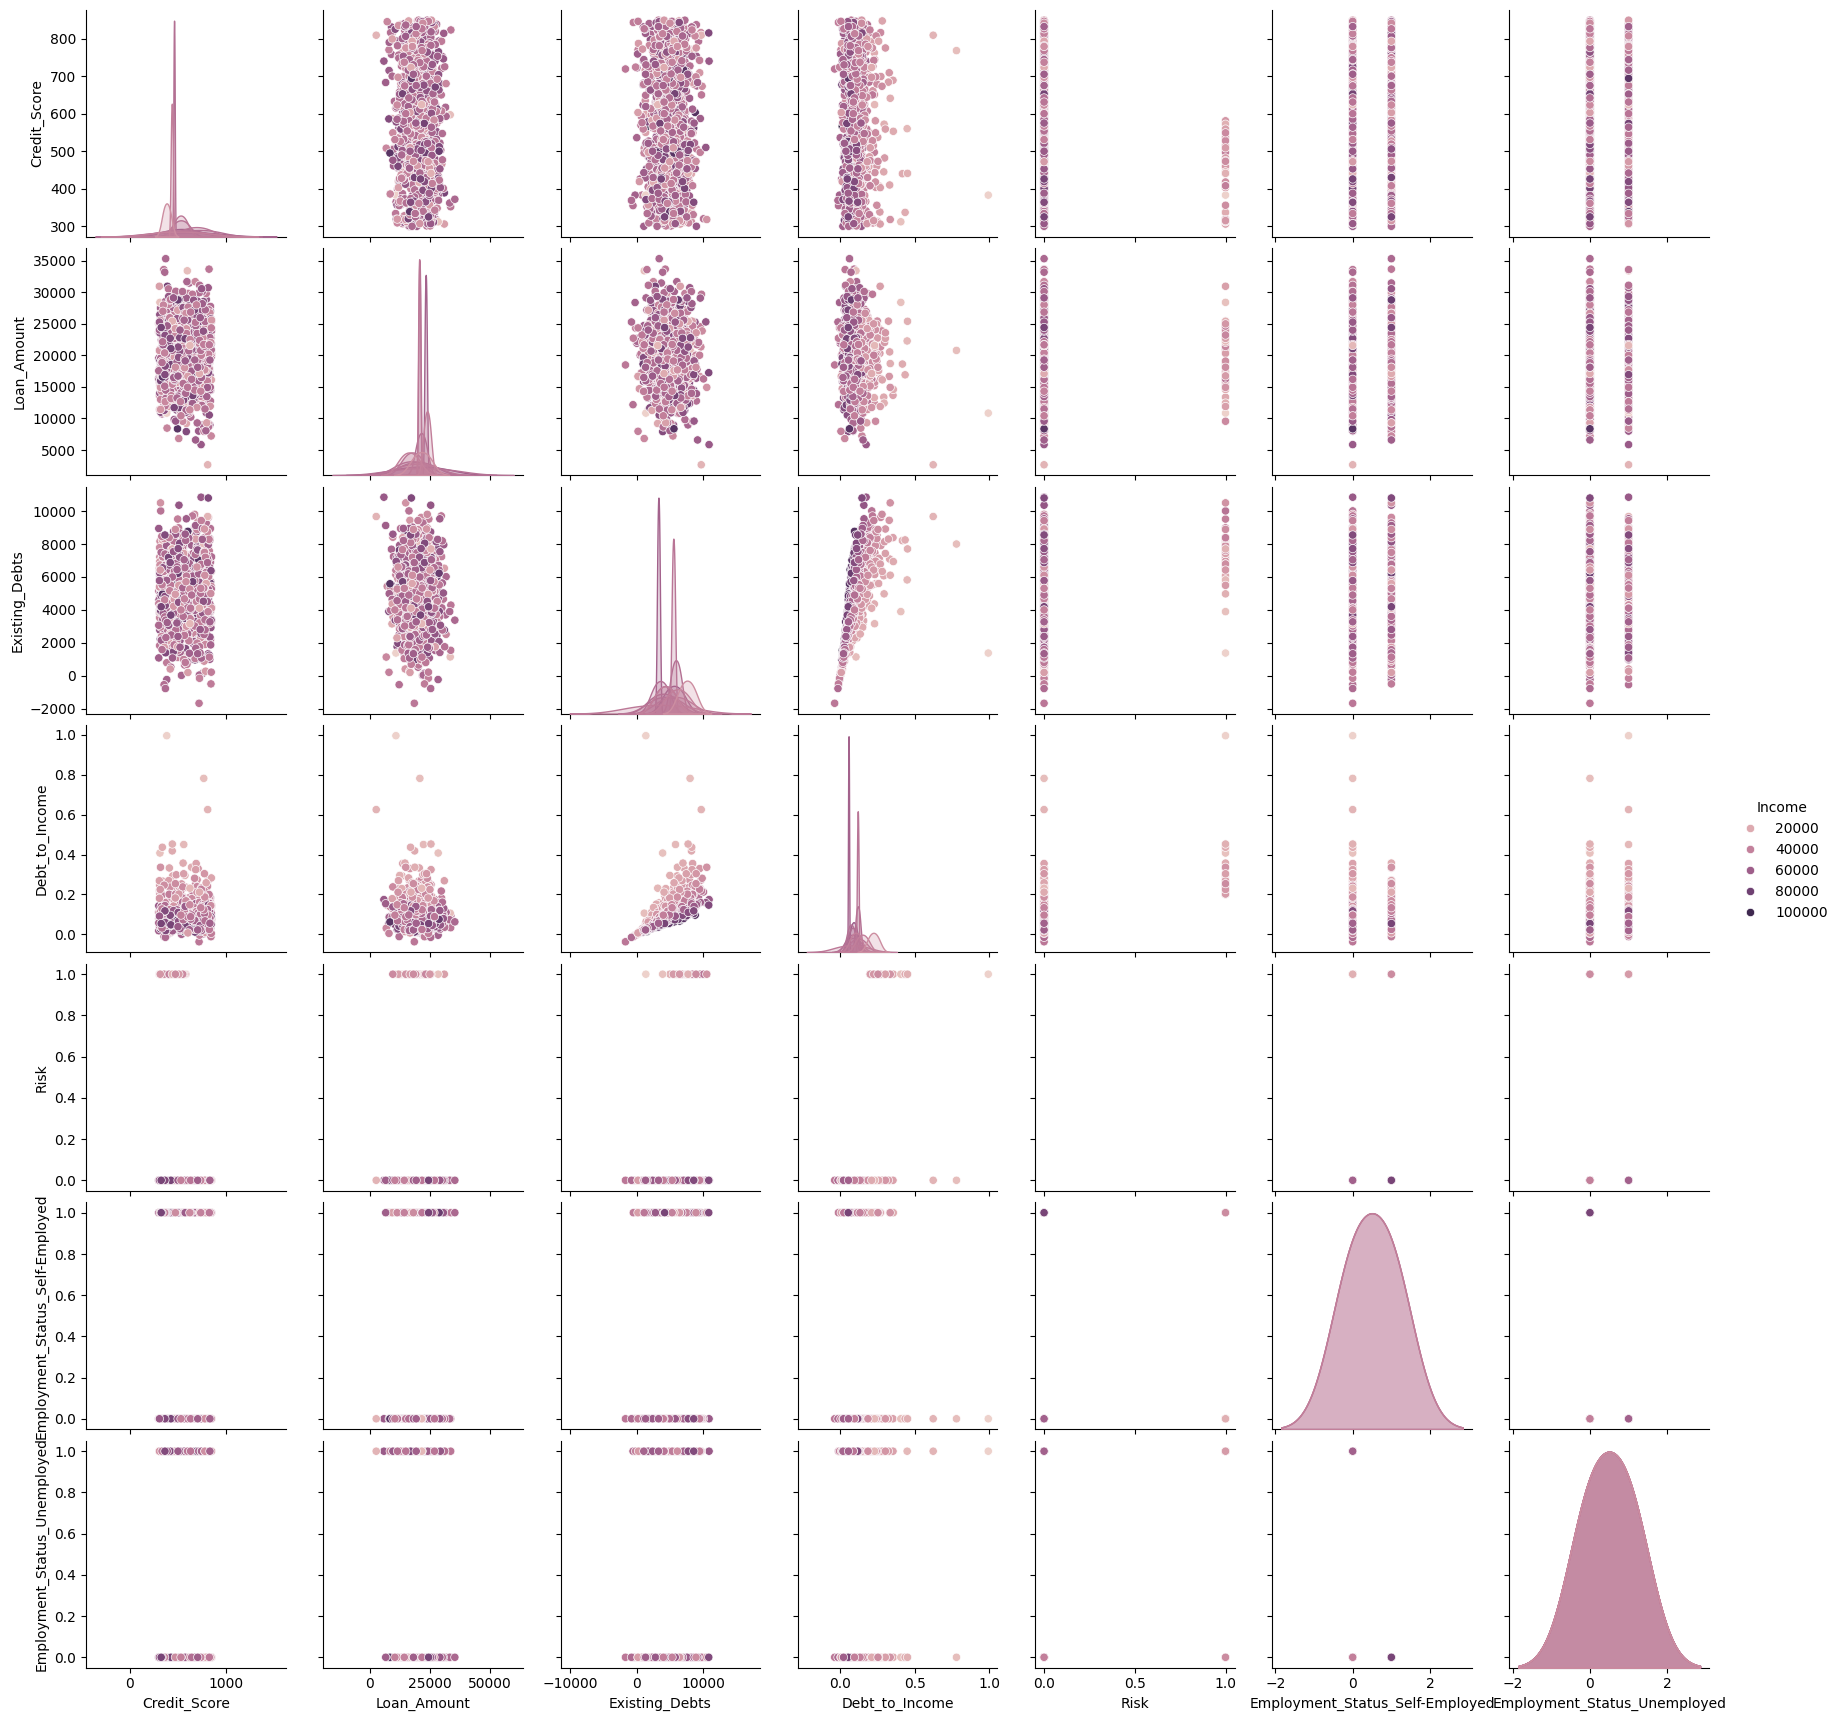

In [279]:
sns.pairplot(data, hue='Income')

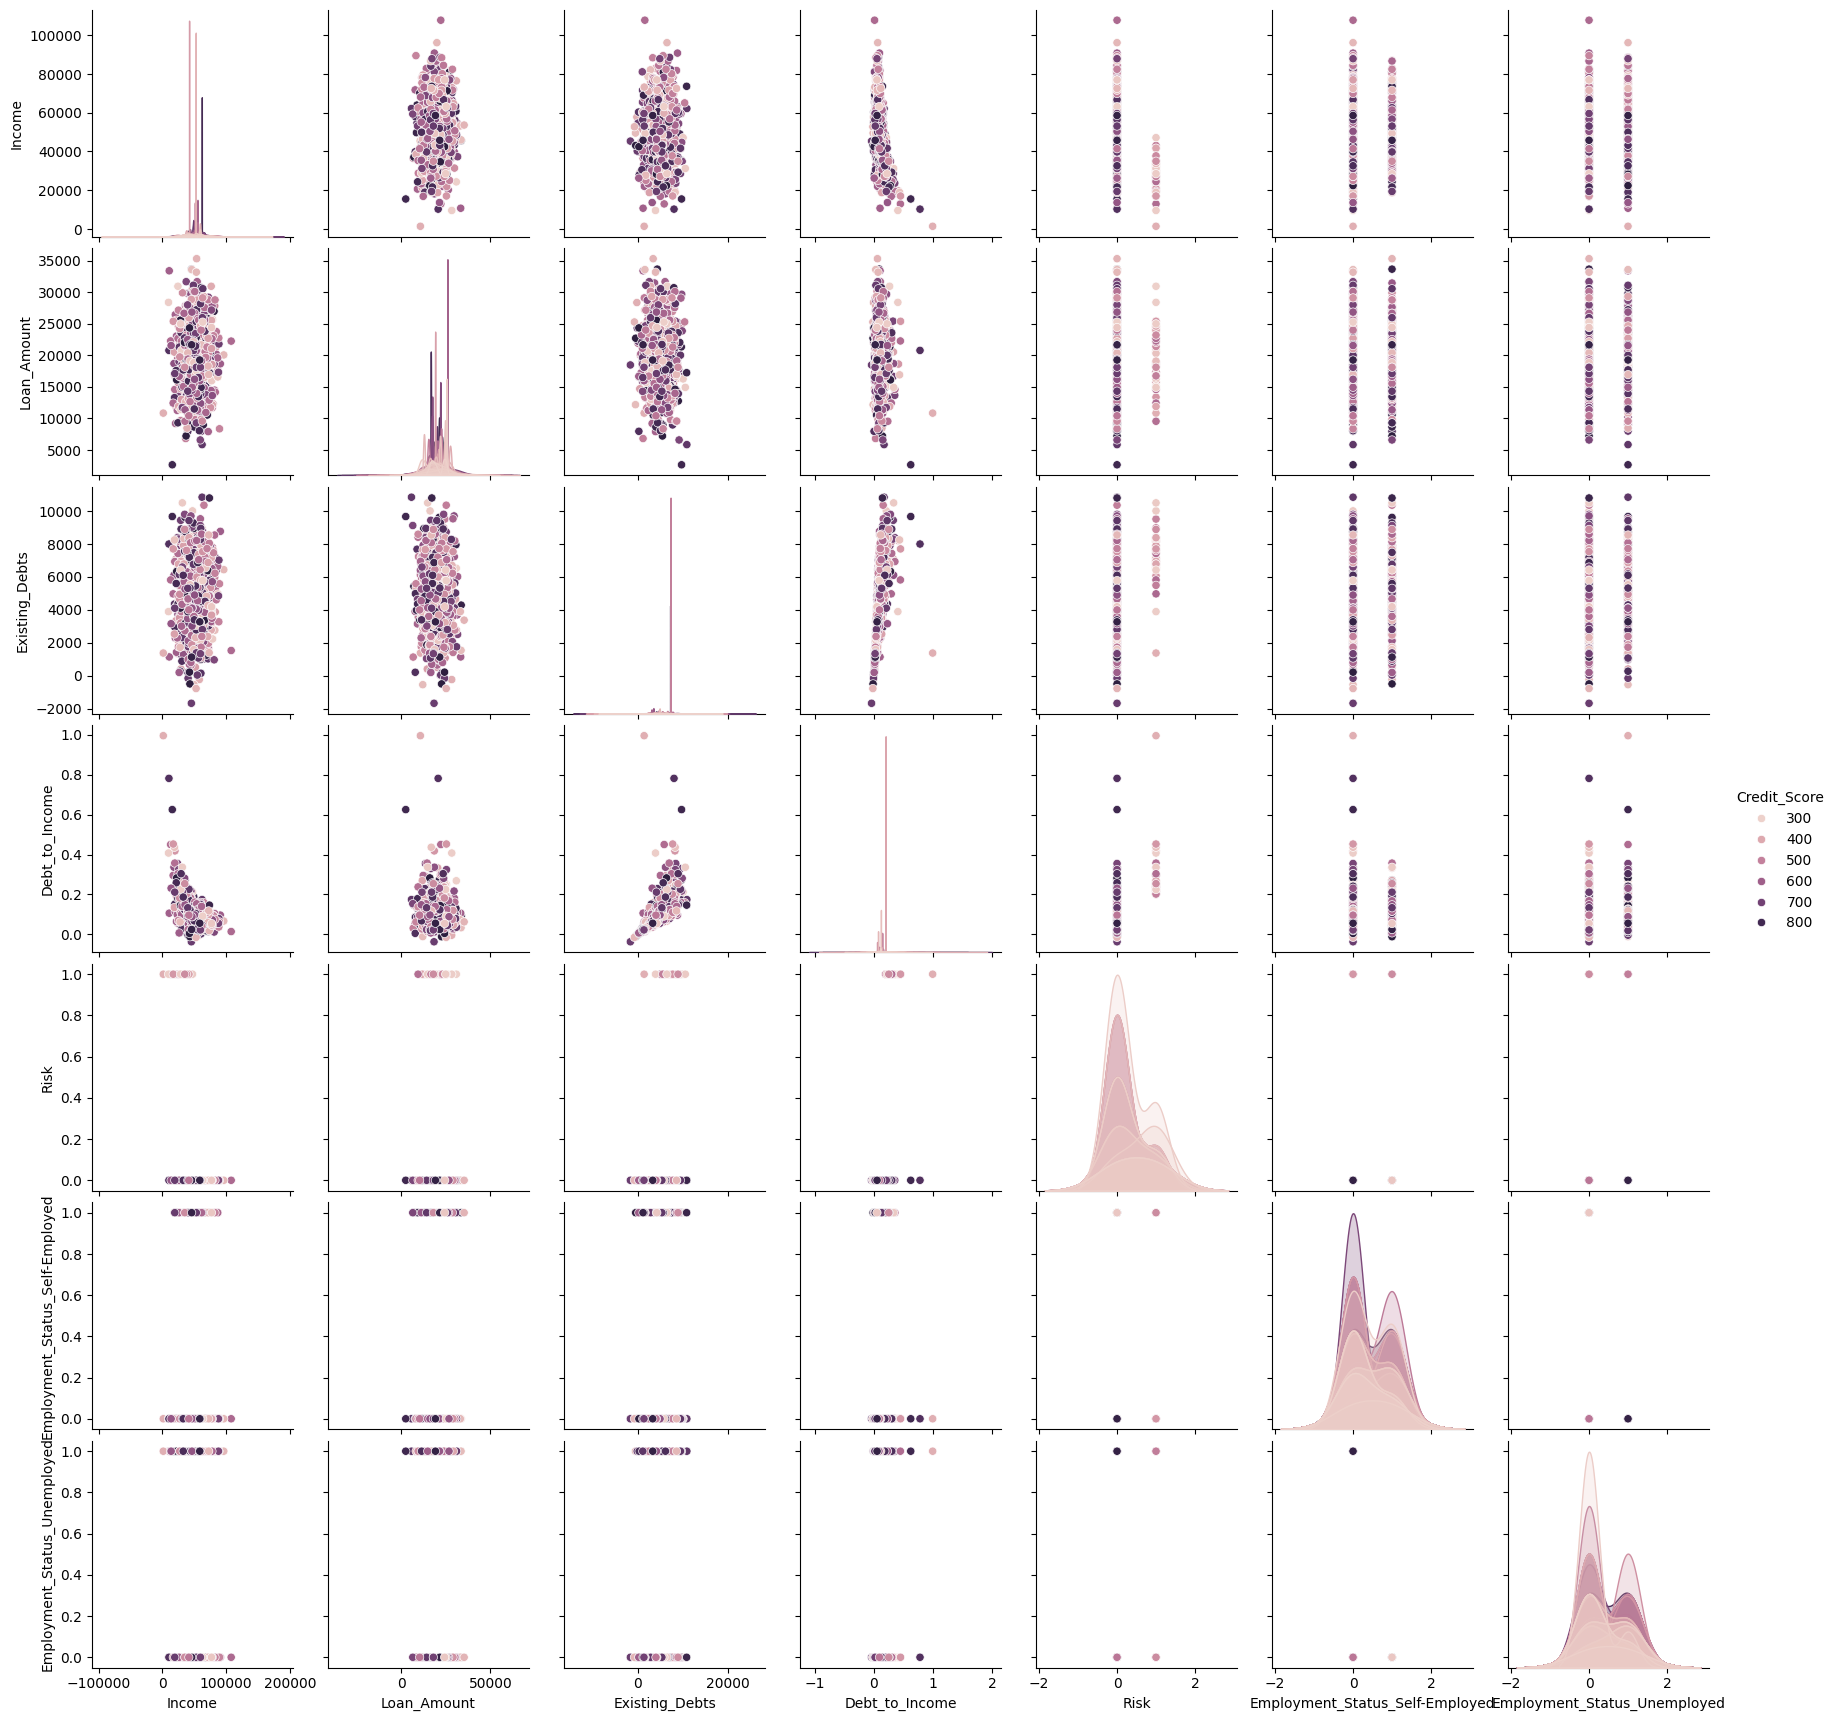

In [280]:
sns.pairplot(data, hue='Credit_Score') 

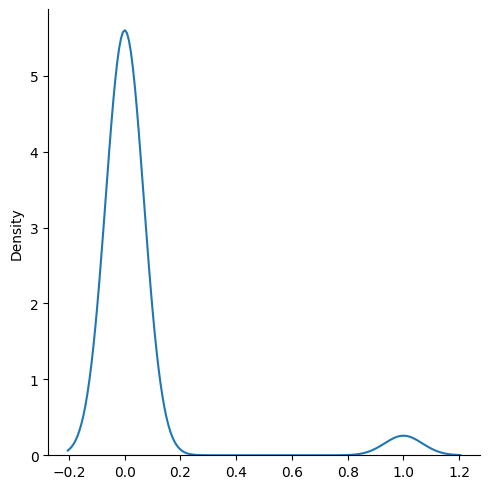

In [281]:
sns.displot(y_pred, kind='kde')
# Line Graph id there is probability distribution 

In [282]:
# Prediction of Applicant 1 
new_applicant = pd.DataFrame({
    'Income': [55000],
    'Credit_Score': [650],
    'Loan_Amount': [25000],
    'Existing_Debts': [4000],
    'Debt_to_Income': [4000/55000],
    'Employment_Status_Self-Employed': [0],
    'Employment_Status_Unemployed': [0]
})

new_applicant_scaled =scaler.transform(new_applicant)
prediction = model.predict(new_applicant_scaled)
probability = model.predict_proba(new_applicant_scaled)[:,1]

print("Example of Applicant Prediction:")
print("Predicted outcome", "High risk" if prediction[0] == 1 else "Low Risk")
print("New Applicantt Predicted Risk", round(probability[0], 3))

Example of Applicant Prediction:
Predicted outcome Low Risk
New Applicantt Predicted Risk 0.15


c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [283]:
# Prediction of Applicant 2
new_applicant = pd.DataFrame({
    'Income': [25000],
    'Credit_Score': [200],
    'Loan_Amount': [20000],
    'Existing_Debts': [4000],
    'Debt_to_Income': [4000/25000],
    'Employment_Status_Self-Employed': [0],
    'Employment_Status_Unemployed': [0]
})

new_applicant_scaled =scaler.transform(new_applicant)
prediction = model.predict(new_applicant_scaled)
probability = model.predict_proba(new_applicant_scaled)[:,1]

print("Example of Applicant Prediction:")
print("Predicted outcome", "High risk" if prediction[0] == 1 else "Low Risk")
print("New Applicantt Predicted Risk", round(probability[0], 3))

Example of Applicant Prediction:
Predicted outcome High risk
New Applicantt Predicted Risk 0.85


c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
